# 杭州萧山区项目`WRF-CMAQ`模拟分析
## 模拟结果分析：*`Process Analysis`*

---
*@author: Evan*\
*@date: 2023-07-11*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.io.shapereader import Reader

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../../src/')
from findpoint import findpoint
import ModelEvaLib as me
from namelist import *

In [2]:
shp_hz = Reader(shpmap)
shp_pro = Reader('D:/data/shapefile/ChinaAdminDivisonSHP-master/2. Province/province.shp')
shp_cit = Reader('D:/data/shapefile/ChinaAdminDivisonSHP-master/3. City/city.shp')

In [3]:
shp_new = Reader('D:/data/shapefile/国界与省界/bou2_4p.shp')

In [4]:
siteloc = pd.read_excel('D:/data/Project_Xiaoshan/周边站点.xlsx',header=0,index_col=1)

sites = siteloc.index

lono = siteloc[siteloc.index.isin(sites)]['经度']
lato = siteloc[siteloc.index.isin(sites)]['纬度']

In [5]:
siteloc[siteloc['城市']=='杭州']

,序号,城市,经度,纬度
站点,,,,
滨江,1223A,杭州,120.210999,30.209999
西溪,1224A,杭州,120.063004,30.274700
千岛湖,1225A,杭州,119.026001,29.635000
下沙,1226A,杭州,120.348000,30.305799
卧龙桥,1227A,杭州,120.126999,30.245600
浙江农大,1228A,杭州,120.190002,30.269199
朝晖五区,1229A,杭州,120.156998,30.289700
和睦小学,1230A,杭州,120.120003,30.311899
临平镇,1231A,杭州,120.301003,30.418301


In [25]:
number = 50

lon1, lat1 = 119.73, 30.18
lon2, lat2 = 121.42, 30.18

lon3, lat3 = 120.32, 30.69
lon4, lat4 = 120.23, 29.73

lon5, lat5 = 119.92, 30.48
lon6, lat6 = 120.67, 29.84

lon7, lat7 = 119.94, 29.82
lon8, lat8 = 120.91, 30.88

lons1 = np.linspace(lon1,lon2,num=number)
lats1 = np.linspace(lat1,lat2,num=number)

lons2 = np.linspace(lon3,lon4,num=number)
lats2 = np.linspace(lat3,lat4,num=number)

lons3 = np.linspace(lon5,lon6,num=number)
lats3 = np.linspace(lat5,lat6,num=number)

lons4 = np.linspace(lon7,lon8,num=number)
lats4 = np.linspace(lat7,lat8,num=number)

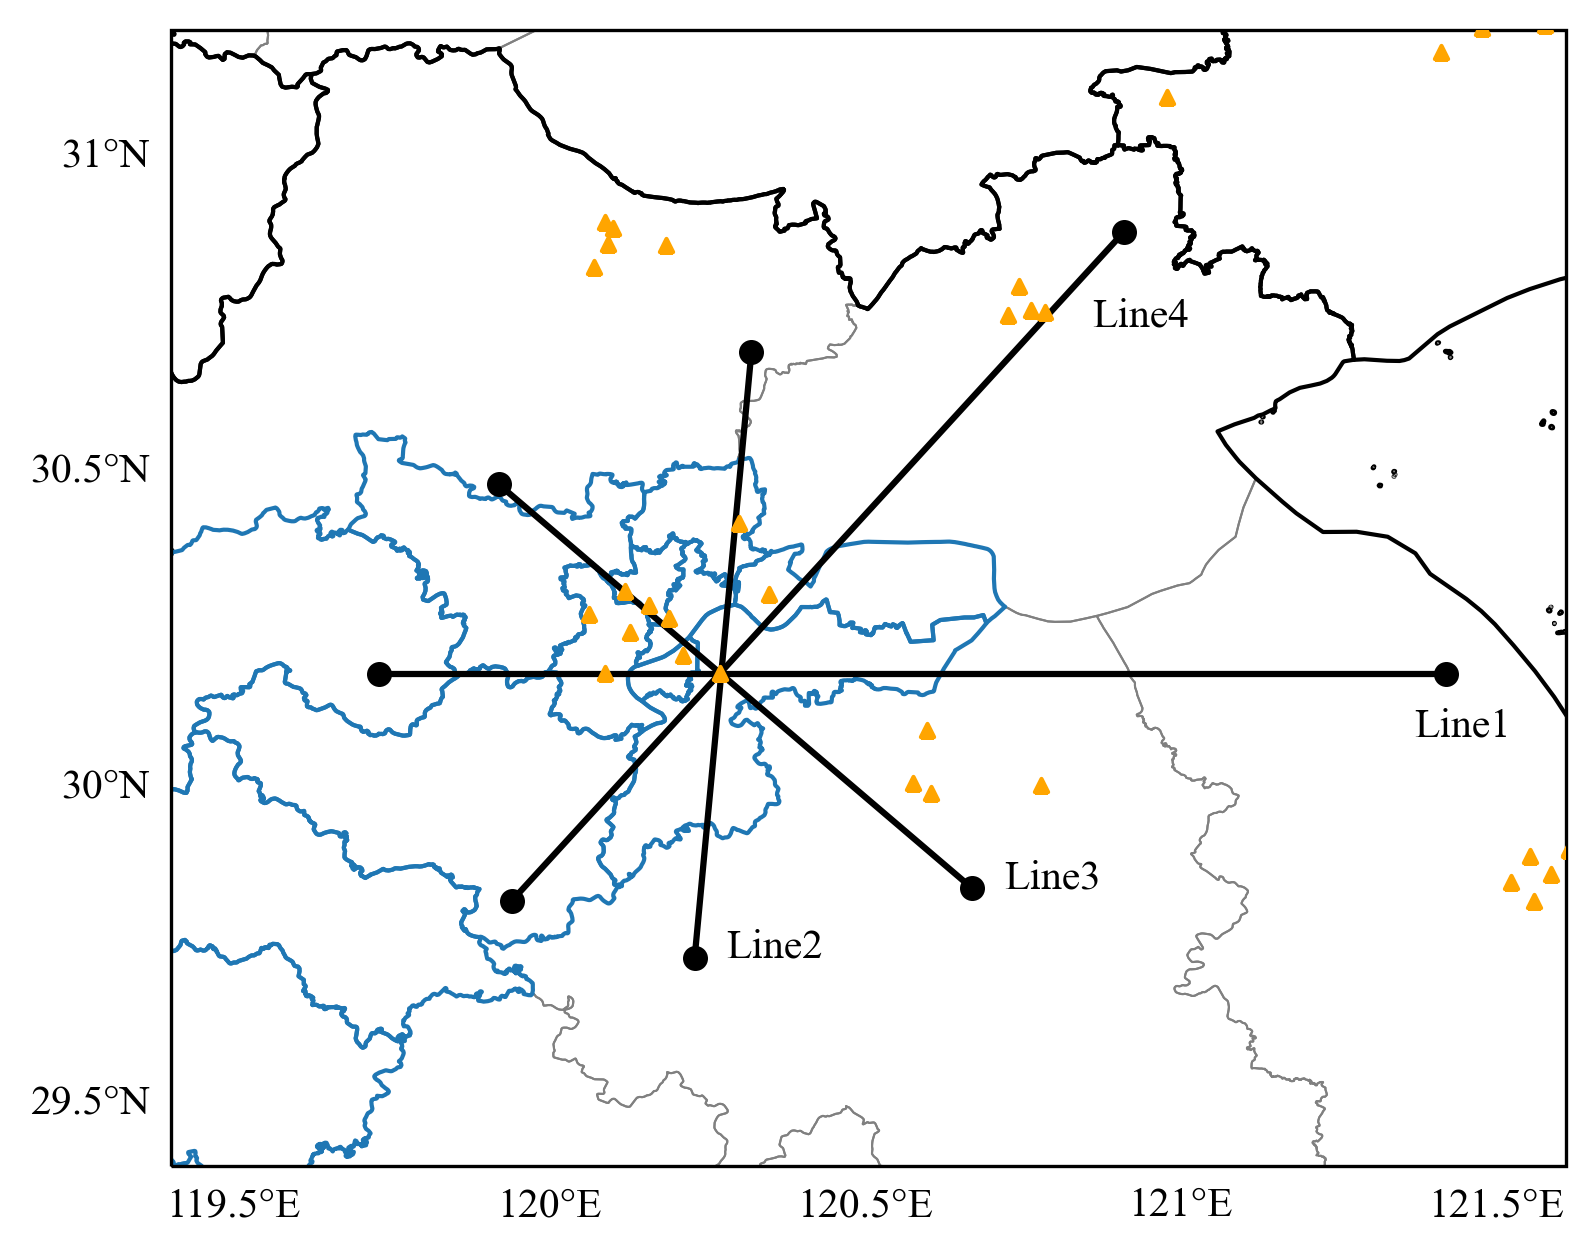

In [27]:
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(6,6),dpi=300)
ax = fig.subplots(1,1,subplot_kw={'projection':proj})
ax.add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='gray',facecolor='None'), linewidth=0.5)
ax.add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1.)
ax.add_feature(cfeat.ShapelyFeature(shp_hz.geometries(),proj,edgecolor='tab:blue',facecolor='None'), linewidth=1)
gl=ax.gridlines(
        xlocs=np.arange(-180, 180 + 1, 0.5), ylocs=np.arange(-90, 90 + 1, 0.5),
        draw_labels=True, x_inline=False, y_inline=False,
        linewidth=0, linestyle='--', color='gray')
gl.top_labels = False
gl.right_labels =False
gl.rotate_labels=False

ax.set_extent([119.4, 121.61, 29.4, 31.2])

ax.plot([lon1, lon2], [lat1, lat2], 'k', transform=proj)
ax.plot(lon1, lat1, 'ko', markersize=5, transform=proj)
ax.plot(lon2, lat2, 'ko', markersize=5, transform=proj)
ax.text(lons1[-1]-0.05,lats1[-1]-0.1,'Line1',color='k',transform=proj)

ax.plot([lon3, lon4], [lat3, lat4], 'k', transform=proj)
ax.plot(lon3, lat3, 'ko', markersize=5, transform=proj)
ax.plot(lon4, lat4, 'ko', markersize=5, transform=proj)
ax.text(lons2[-1]+0.05,lats2[-1],'Line2',color='k',transform=proj)

ax.plot([lon5, lon6], [lat5, lat6], 'k', transform=proj)
ax.plot(lon5, lat5, 'ko', markersize=5, transform=proj)
ax.plot(lon6, lat6, 'ko', markersize=5, transform=proj)
ax.text(lon6+0.05,lat6,'Line3',color='k',transform=proj)

ax.plot([lon7, lon8], [lat7, lat8], 'k', transform=proj)
ax.plot(lon7, lat7, 'ko', markersize=5, transform=proj)
ax.plot(lon8, lat8, 'ko', markersize=5, transform=proj)
ax.text(lon8-0.05,lat8-0.15,'Line4',color='k',transform=proj)

ax.scatter(lono,lato,marker='^',s=10,color='orange',transform=proj,zorder=4)

plt.show()

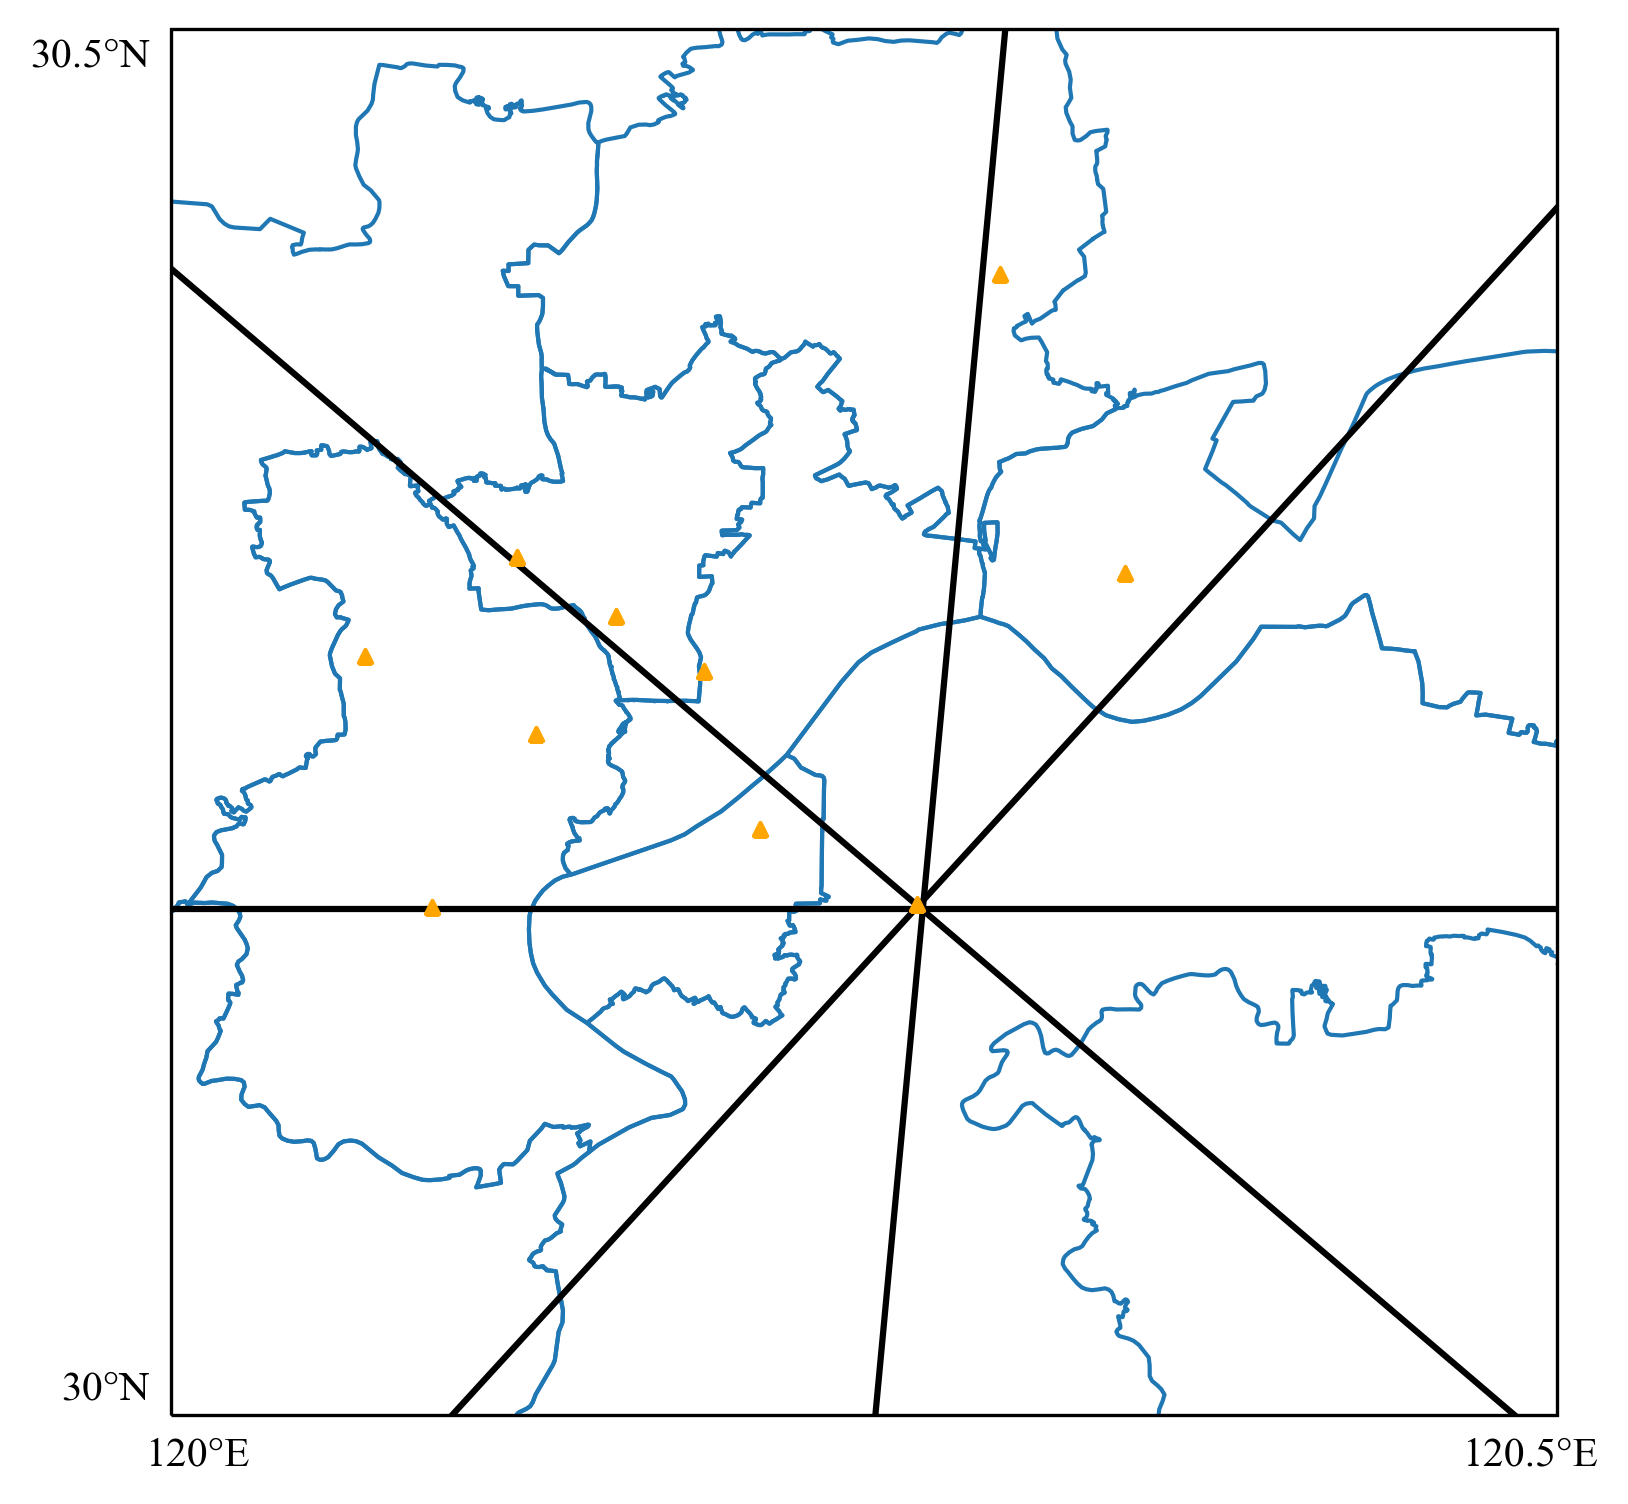

In [26]:
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(6,6),dpi=300)
ax = fig.subplots(1,1,subplot_kw={'projection':proj})
ax.add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='gray',facecolor='None'), linewidth=0.5)
ax.add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1.)
ax.add_feature(cfeat.ShapelyFeature(shp_hz.geometries(),proj,edgecolor='tab:blue',facecolor='None'), linewidth=1)
gl=ax.gridlines(
        xlocs=np.arange(-180, 180 + 1, 0.5), ylocs=np.arange(-90, 90 + 1, 0.5),
        draw_labels=True, x_inline=False, y_inline=False,
        linewidth=0, linestyle='--', color='gray')
gl.top_labels = False
gl.right_labels =False
gl.rotate_labels=False

ax.set_extent([119.99, 120.51, 29.99, 30.51])

ax.plot([lon1, lon2], [lat1, lat2], 'k', transform=proj)
ax.plot(lon1, lat1, 'ko', markersize=5, transform=proj)
ax.plot(lon2, lat2, 'ko', markersize=5, transform=proj)
# ax.text(lons1[-1]-0.05,lats1[-1]-0.1,'Line1',color='k',transform=proj)

ax.plot([lon3, lon4], [lat3, lat4], 'k', transform=proj)
ax.plot(lon3, lat3, 'ko', markersize=5, transform=proj)
ax.plot(lon4, lat4, 'ko', markersize=5, transform=proj)
# ax.text(lons2[-1]+0.05,lats2[-1],'Line2',color='k',transform=proj)

ax.plot([lon5, lon6], [lat5, lat6], 'k', transform=proj)
ax.plot(lon5, lat5, 'ko', markersize=5, transform=proj)
ax.plot(lon6, lat6, 'ko', markersize=5, transform=proj)
# ax.text(lon6+0.05,lat6,'Line3',color='k',transform=proj)

ax.plot([lon7, lon8], [lat7, lat8], 'k', transform=proj)
ax.plot(lon7, lat7, 'ko', markersize=5, transform=proj)
ax.plot(lon8, lat8, 'ko', markersize=5, transform=proj)
# ax.text(lon8-0.05,lat8-0.15,'Line4',color='k',transform=proj)

ax.scatter(lono,lato,marker='^',s=10,color='orange',transform=proj,zorder=4)

plt.show()

## 确认各个剖面第几个点是市区

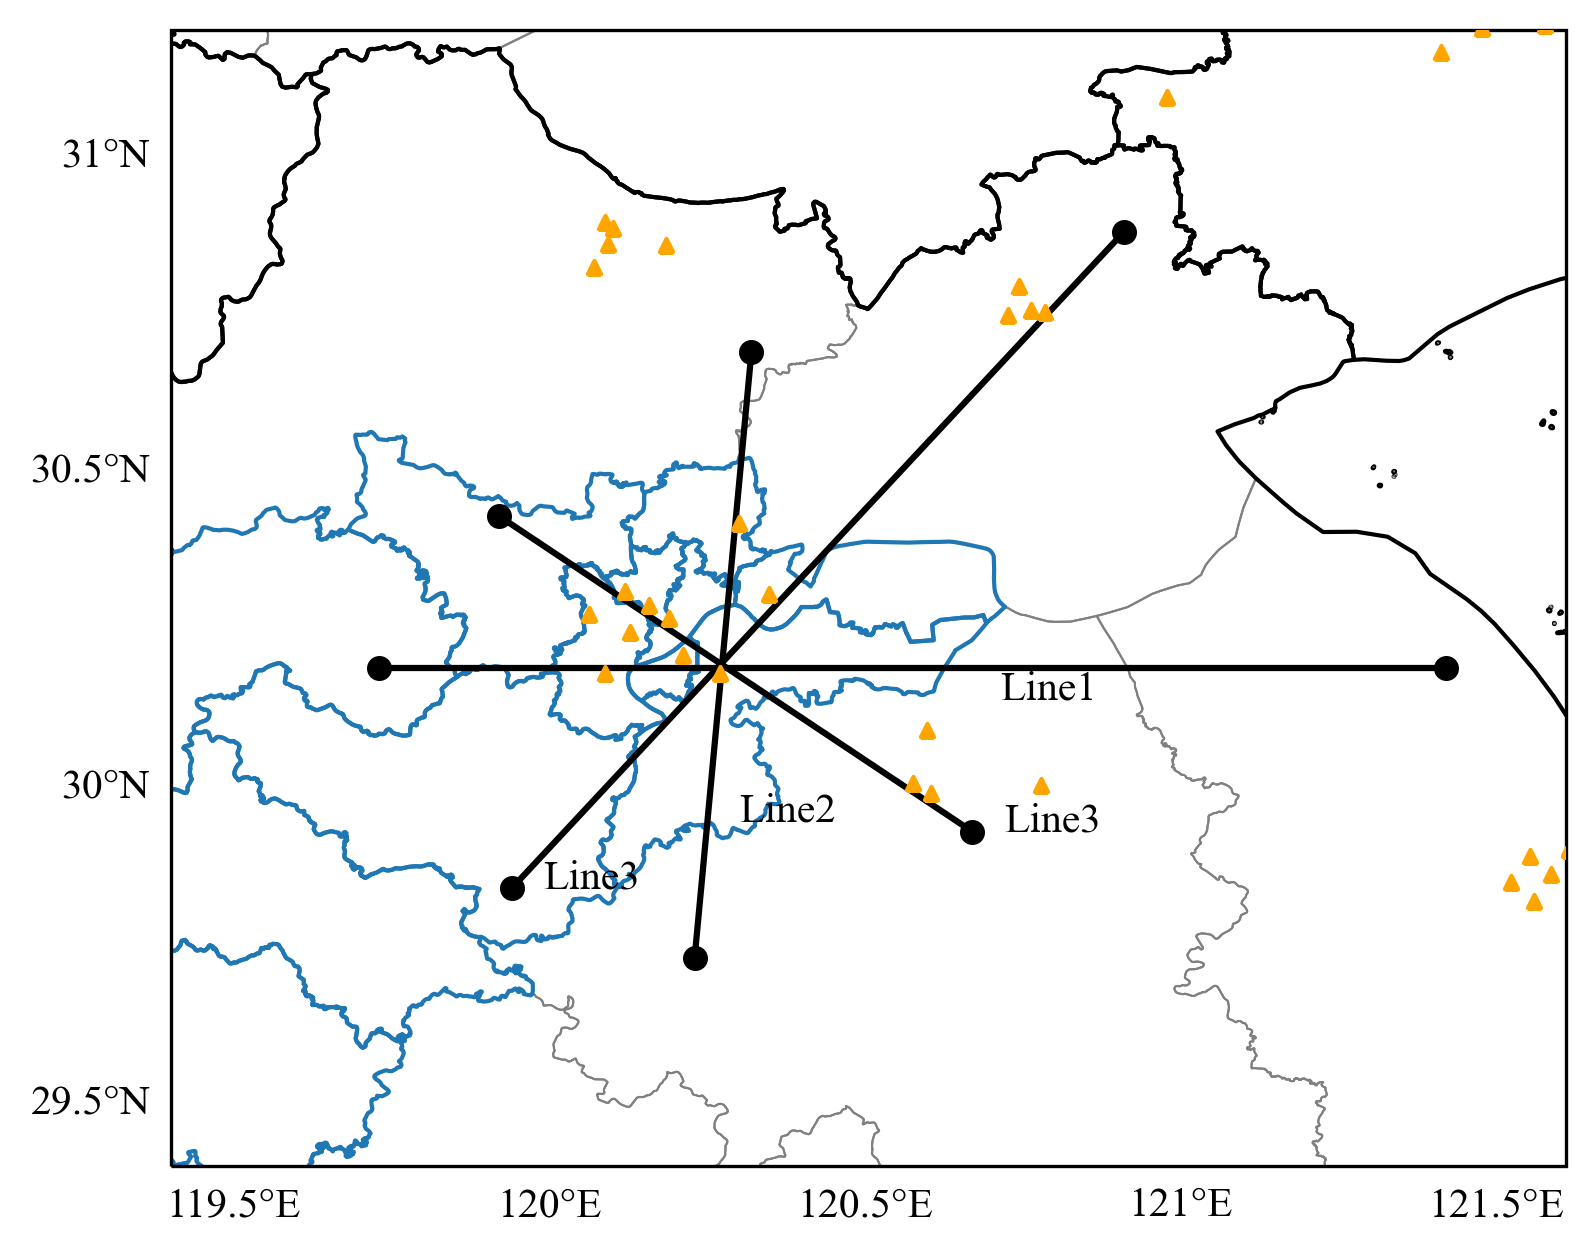

In [ ]:
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(6,6),dpi=300)
ax = fig.subplots(1,1,subplot_kw={'projection':proj})
ax.add_feature(cfeat.ShapelyFeature(shp_cit.geometries(),proj,edgecolor='gray',facecolor='None'), linewidth=0.5)
ax.add_feature(cfeat.ShapelyFeature(shp_pro.geometries(),proj,edgecolor='k',facecolor='None'), linewidth=1.)
ax.add_feature(cfeat.ShapelyFeature(shp_hz.geometries(),proj,edgecolor='tab:blue',facecolor='None'), linewidth=1)
gl=ax.gridlines(
        xlocs=np.arange(-180, 180 + 1, 0.5), ylocs=np.arange(-90, 90 + 1, 0.5),
        draw_labels=True, x_inline=False, y_inline=False,
        linewidth=0, linestyle='--', color='gray')
gl.top_labels = False
gl.right_labels =False
gl.rotate_labels=False

ax.set_extent([119.4, 121.61, 29.4, 31.2])

ax.plot([lon1, lon2], [lat1, lat2], 'k', transform=proj)
ax.plot(lon1, lat1, 'ko', markersize=5, transform=proj)
ax.plot(lon2, lat2, 'ko', markersize=5, transform=proj)
ax.text(lons1[30]-0.05,lats1[30]-0.05,'Line1',color='k',transform=proj)
# ax.plot(lons1[23],lats1[23],'ro',markersize=6, transform=proj)
# ax.plot(lons1[30],lats1[30],'ro',markersize=6, transform=proj)
# ax.plot([lons1[23],lons1[30]],[lats1[23],lats1[30]],'r', transform=proj)

ax.plot([lon3, lon4], [lat3, lat4], 'k', transform=proj)
ax.plot(lon3, lat3, 'ko', markersize=5, transform=proj)
ax.plot(lon4, lat4, 'ko', markersize=5, transform=proj)
ax.text(lons2[38]+0.05,lats2[38],'Line2',color='k',transform=proj)
# ax.plot(lons2[32],lats2[32],'ro',markersize=6, transform=proj)
# ax.plot(lons2[38],lats2[38],'ro',markersize=6, transform=proj)
# ax.plot([lons2[32],lons2[38]],[lats2[32],lats2[38]],'r', transform=proj)

ax.plot([lon5, lon6], [lat5, lat6], 'k', transform=proj)
ax.plot(lon5, lat5, 'ko', markersize=5, transform=proj)
ax.plot(lon6, lat6, 'ko', markersize=5, transform=proj)
ax.text(lon6+0.05,lat6,'Line3',color='k',transform=proj)
# ax.plot(lons3[18],lats3[18],'ro',markersize=6, transform=proj)
# ax.plot(lons3[32],lats3[32],'ro',markersize=6, transform=proj)
# ax.plot([lons3[18],lons3[32]],[lats3[18],lats3[32]],'r', transform=proj)

ax.plot([lon7, lon8], [lat7, lat8], 'k', transform=proj)
ax.plot(lon7, lat7, 'ko', markersize=5, transform=proj)
ax.plot(lon8, lat8, 'ko', markersize=5, transform=proj)
ax.text(lon8+0.05,lat8,'Line3',color='k',transform=proj)
# ax.plot(lons3[18],lats3[18],'ro',markersize=6, transform=proj)
# ax.plot(lons3[32],lats3[32],'ro',markersize=6, transform=proj)
# ax.plot([lons3[18],lons3[32]],[lats3[18],lats3[32]],'r', transform=proj)

ax.scatter(lono,lato,marker='^',s=10,color='orange',transform=proj,zorder=4)

plt.show()